#<div dir="rtl" align=center>Summary data by variable and the groupby method</div> 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url_tracks = 'https://s3.eu-west-1.amazonaws.com/data.cyber.org.il/virtual_courses/introdata/colab/spotify_tracks1.csv'
url_artists = 'https://s3.eu-west-1.amazonaws.com/data.cyber.org.il/virtual_courses/introdata/colab/artists.csv'

In [ ]:
tracks = pd.read_csv(url_tracks)
artists = pd.read_csv(url_artists)

In [ ]:
tracks_artists = pd.merge(left=tracks, right=artists, left_on='id_artists',right_on='id')

In [ ]:
tracks_artists.loc[tracks_artists.artists=='Arik Einstein',:].head()

,name_x,artists,id_artists,release_year,popularity_x,duration_minutes,key,mode,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,followers,genres,name_y,popularity_y
114215,הימים הארוכים העצובים,Arik Einstein,16XberediOtO5CaMrx85cR,1968,33,3.550000,Re,0,0,0.462,0.388,-13.023,0.0375,0.336,0.000051,0.1030,0.606,96.479,16XberediOtO5CaMrx85cR,319224.0,"['classic israeli pop', 'israeli rock', 'israe...",Arik Einstein,53
114216,רוח רוח,Arik Einstein,16XberediOtO5CaMrx85cR,1968,32,3.561550,Do,1,0,0.601,0.506,-14.175,0.0345,0.744,0.000006,0.1130,0.936,139.362,16XberediOtO5CaMrx85cR,319224.0,"['classic israeli pop', 'israeli rock', 'israe...",Arik Einstein,53
114219,Sa Leat,Arik Einstein,16XberediOtO5CaMrx85cR,1974,42,4.296700,Do,1,0,0.409,0.377,-13.552,0.0346,0.622,0.000205,0.1070,0.513,156.291,16XberediOtO5CaMrx85cR,319224.0,"['classic israeli pop', 'israeli rock', 'israe...",Arik Einstein,53
114229,מה שהיה היה,Arik Einstein,16XberediOtO5CaMrx85cR,1968,21,3.417117,Re,0,0,0.526,0.308,-15.515,0.0407,0.175,0.000003,0.2090,0.440,114.099,16XberediOtO5CaMrx85cR,319224.0,"['classic israeli pop', 'israeli rock', 'israe...",Arik Einstein,53
114236,Don Kishot,Arik Einstein,16XberediOtO5CaMrx85cR,1972,24,3.569200,Fa,1,0,0.578,0.331,-14.938,0.0312,0.695,0.004560,0.0742,0.432,98.325,16XberediOtO5CaMrx85cR,319224.0,"['classic israeli pop', 'israeli rock', 'israe...",Arik Einstein,53


In [ ]:
print("left", tracks.shape)
print("right", artists.shape)
print("merged", tracks_artists.shape)

left (521259, 18)
right (1104349, 5)
merged (509540, 23)


In [ ]:
tracks.loc[521182,:]

name                  Crickets in the Rain
artists                     Cricket Sounds
id_artists          2GAPMuSaXaAV31SJB4s4pO
release_year                          2016
popularity                              44
duration_minutes                    2.8528
key                                  Mi(b)
mode                                     1
explicit                                 0
danceability                         0.359
energy                               0.366
loudness                           -31.193
speechiness                         0.0728
acousticness                         0.123
instrumentalness                     0.611
liveness                             0.266
valence                              0.107
tempo                               85.059
Name: 521182, dtype: object

In [ ]:
artists.loc[artists.id=='2GAPMuSaXaAV31SJB4s4pO']

In [ ]:
'cat' in 'dog,cat,mouse'

In [ ]:
'cat' in 'dog,hat,mouse'

In [ ]:
'cat' in "I'll catch you later"

In [ ]:
metal_yes_no = ['metal' in genre for genre in tracks_artists['genres']]

In [ ]:
tracks_artists['is_metal'] = metal_yes_no

#<div dir="rtl" align=center> merge</div> 

In [ ]:
mean_energy_by_year_and_genre = tracks_artists.groupby(['release_year','is_metal'])['energy'].mean()

In [ ]:
mean_energy_by_year_and_genre = mean_energy_by_year_and_genre.reset_index()

In [ ]:
mean_energy_by_year_and_genre.head(10)

,release_year,is_metal,energy
0,1922,False,0.333188
1,1923,False,0.266863
2,1924,False,0.360377
3,1925,False,0.262097
4,1926,False,0.248240
5,1927,False,0.275829
6,1928,False,0.256538
7,1929,False,0.323454
8,1930,False,0.332396
9,1931,False,0.281772


In [ ]:
mean_energy_by_year_and_genre.loc[mean_energy_by_year_and_genre['is_metal']==True,'release_year'].values

array([1934, 1937, 1964, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

In [ ]:
tracks_artists = tracks_artists.loc[tracks_artists.release_year>1900,:]

In [ ]:
mean_energy_by_year_and_genre.head(10)

,release_year,is_metal,energy
0,1922,False,0.333188
1,1923,False,0.266863
2,1924,False,0.360377
3,1925,False,0.262097
4,1926,False,0.248240
5,1927,False,0.275829
6,1928,False,0.256538
7,1929,False,0.323454
8,1930,False,0.332396
9,1931,False,0.281772


In [ ]:
energy_by_year_is_metal = mean_energy_by_year_and_genre.loc[
    mean_energy_by_year_and_genre['is_metal'] == True, :
    ]

In [ ]:
energy_by_year_not_metal = mean_energy_by_year_and_genre.loc[
    mean_energy_by_year_and_genre['is_metal'] == False, :
    ]

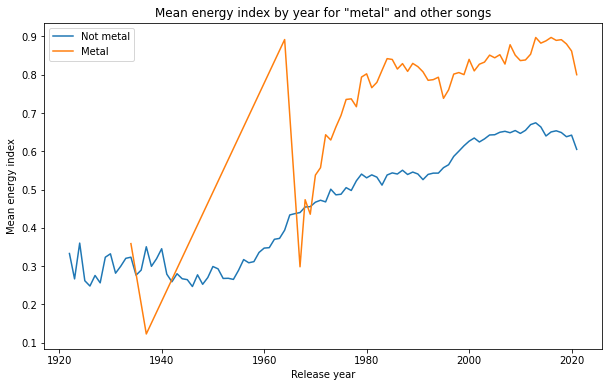

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(energy_by_year_not_metal['release_year'], energy_by_year_not_metal['energy'], label = "Not metal")
plt.plot(energy_by_year_is_metal['release_year'], energy_by_year_is_metal['energy'], label = "Metal")
plt.title('Mean energy index by year for "metal" and other songs')
plt.xlabel('Release year')
plt.ylabel('Mean energy index')
plt.legend();

In [ ]:
energy_by_year_is_metal_after_1967 = energy_by_year_is_metal.loc[energy_by_year_is_metal['release_year'] >= 1967, :]

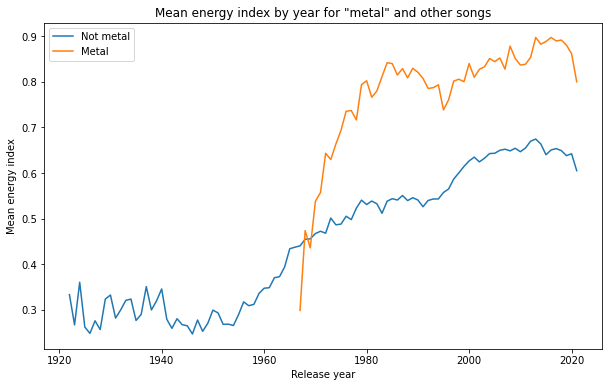

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(energy_by_year_not_metal['release_year'], energy_by_year_not_metal['energy'], label = "Not metal")
plt.plot(energy_by_year_is_metal_after_1967['release_year'], energy_by_year_is_metal_after_1967['energy'], label = "Metal")
plt.title('Mean energy index by year for "metal" and other songs')
plt.xlabel('Release year')
plt.ylabel('Mean energy index')
plt.legend();